In [1]:
# importing the necessities
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Position_Salaries.csv")
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [3]:
x = df.iloc[:,1:2].values # it is written this way so that we can get the results  as the matrix of two, as required by the machine learing algorithm
# x = df.iloc[:, 1].values #writting it this way will return a one matrix, hence not suitable for the machine learning algorithm
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [4]:
y = df.iloc[:, 2].values
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [5]:
# linear regression model
from sklearn.linear_model import LinearRegression

In [6]:
lm = LinearRegression()

In [7]:
lm.fit(x, y)

LinearRegression()

#  visualizing the linear regression results

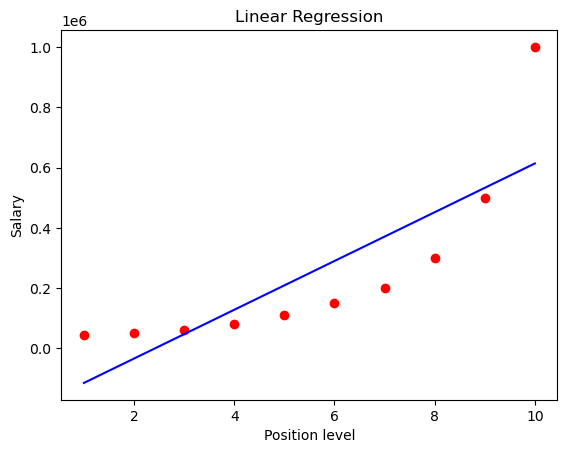

In [8]:
plt.scatter(x, y, color = 'red')
plt.plot(x, lm.predict(x), color = 'blue')
plt.title('Linear Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

the red dots are the actual data points while the blue line is what the model has created. therefore we can conclude that 
linear model is not suitable with this dataset.

In [9]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='Salary~Level', data=df).fit()

lm.conf_int()
lm.summary()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     16.17
Date:                Mon, 24 Apr 2023   Prob (F-statistic):            0.00383
Time:                        08:00:41   Log-Likelihood:                -134.23
No. Observations:                  10   AIC:                             272.5
Df Residuals:                       8   BIC:                             273.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.953e+05   1.25e+05     -1.565      0.156   -4.83e+05    9.24e+04
Level       8.088e+04   2.01e+04      4.021      0.004    3.45e+04    1.27e+05
==============================================================================
Omnibus:                        5.661   Durbin-Watson:                   0.786
Prob(Omnibus):                  0.059   Jarque-Bera (JB):                2.297
Skew:                           1.148   Prob(JB):                        0.317
Kurtosis:                       3.492   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
# fitting polynomial regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree =2) # trying to create a 2 degree polynomial equation, which squares the x
X_poly = poly_reg.fit_transform(x) # trying to transform the data not feeding it into the model
print(X_poly)

poly_reg.fit(X_poly, y)

[[  1.   1.   1.]
 [  1.   2.   4.]
 [  1.   3.   9.]
 [  1.   4.  16.]
 [  1.   5.  25.]
 [  1.   6.  36.]
 [  1.   7.  49.]
 [  1.   8.  64.]
 [  1.   9.  81.]
 [  1.  10. 100.]]


PolynomialFeatures()

In [11]:
# doing the actual polynomial regression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression()

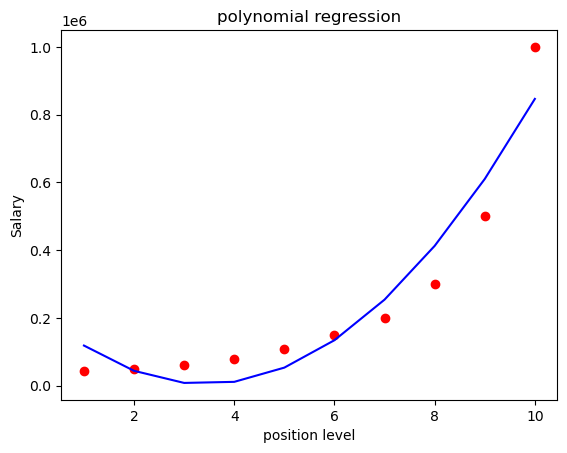

In [12]:
# visualizing the polynomial regression results
plt.scatter(x, y, color = 'red')
plt.plot(x, lin_reg.predict(poly_reg.fit_transform(x)) ,color = 'blue')
plt.title("polynomial regression")
plt.xlabel("position level")
plt.ylabel("Salary")
plt.show()

from the visualization a two degree equation is not a good fit, therefore try to increase a degree of freedom to see
if you will be able to find a good fit

In [13]:
# fitting polynomial regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg1 = PolynomialFeatures(degree = 4)
X_poly1 = poly_reg1.fit_transform(x)
print(X_poly1)

poly_reg1.fit(X_poly1, y)
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly1, y)

[[1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01]
 [1.000e+00 3.000e+00 9.000e+00 2.700e+01 8.100e+01]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01 2.560e+02]
 [1.000e+00 5.000e+00 2.500e+01 1.250e+02 6.250e+02]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02 1.296e+03]
 [1.000e+00 7.000e+00 4.900e+01 3.430e+02 2.401e+03]
 [1.000e+00 8.000e+00 6.400e+01 5.120e+02 4.096e+03]
 [1.000e+00 9.000e+00 8.100e+01 7.290e+02 6.561e+03]
 [1.000e+00 1.000e+01 1.000e+02 1.000e+03 1.000e+04]]


LinearRegression()

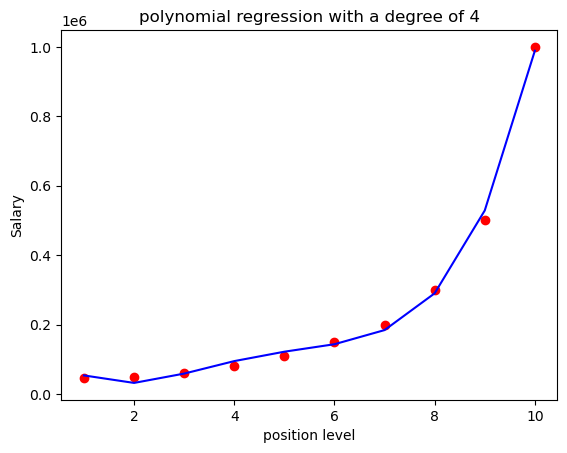

In [14]:
# visualizing the polynomial regression results
plt.scatter(x, y, color = 'red')
plt.plot(x, lin_reg2.predict(poly_reg1.fit_transform(x)), color = 'blue')
plt.title("polynomial regression with a degree of 4")
plt.xlabel("position level")
plt.ylabel("Salary")
plt.show()

here we can see that the model created with a degree of 4 now accurately fits the dataset.


In [15]:
pip freeze

absl-py==1.4.0
africastalking==1.2.4
alabaster @ file:///home/ktietz/src/ci/alabaster_1611921544520/work
altgraph==0.17.3
anaconda-client==1.11.0
anaconda-navigator==2.3.2
anaconda-project @ file:///C:/Windows/TEMP/abs_91fu4tfkih/croots/recipe/anaconda-project_1660339890874/work
anyio @ file:///C:/ci/anyio_1644481921011/work/dist
appdirs==1.4.4
argon2-cffi @ file:///opt/conda/conda-bld/argon2-cffi_1645000214183/work
argon2-cffi-bindings @ file:///C:/ci/argon2-cffi-bindings_1644551690056/work
arrow @ file:///opt/conda/conda-bld/arrow_1649166651673/work
astroid @ file:///C:/Windows/TEMP/abs_b0dtxgpicv/croots/recipe/astroid_1659023126745/work
astropy @ file:///C:/ci/astropy_1657719656942/work
astunparse==1.6.3
async-generator==1.10
atomicwrites==1.4.0
attrs @ file:///opt/conda/conda-bld/attrs_1642510447205/work
Automat @ file:///tmp/build/80754af9/automat_1600298431173/work
autopep8 @ file:///opt/conda/conda-bld/autopep8_1650463822033/work
Babel @ file:///tmp/build/80754af9/babel_16208714